# Domain Coloring

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
%matplotlib inline
import PIL
import time
import math
import numpy as np
import mpmath as mp
import scipy.special
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
rcdef = plt.rcParams.copy()
plt.rcParams['figure.figsize'] = 18, 12

In [3]:
def domaincol_m(w,  s): #domain coloring with modulus track
   # w the array of values
   #s is the constant Saturation
   H=Hcomplex(w) 
   modulus=np.absolute(w)
   c= np.log(2)
   Logm=np.log(modulus)/c#log base 2
   Logm=np.nan_to_num(Logm)
   V=Logm-np.floor(Logm)
   S = s*np.ones_like(H, float)
   HSV = np.dstack((H,S,V**0.2))# V**0.2>V for V in[0,1];this choice  avoids too dark colors
   RGB=hsv_to_rgb(HSV) 
   return RGB

In [4]:
def Hcomplex(z):# computes the hue corresponding to the complex number z
    H=np.angle(z)/(2*np.pi)+1
    return np.mod(H,1)

In [5]:
def func_vals(f, re, im,  N): #evaluates the complex function at the nodes of the grid
   #re and im are  tuples, re=(a,b) and im=(c,d), defining the rectangular region
   #N is the number of nodes per unit interval  
   l=re[1]-re[0]
   h=im[1]-im[0]
   resL=N*l #horizontal resolution
   resH=N*h#vertical resolution
   x=np.linspace(re[0], re[1],resL)
   y=np.linspace(im[0], im[1], resH)
   x,y=np.meshgrid(x,y)
   z=x+1j*y
   w=f(z)
   return w 

In [6]:
def domaincol_c(w, s):#Classical domain coloring
    #w is the complex array of values f(z)
    #s is the constant saturation
    indi=np.where(np.isinf(w))#detects the values w=a+ib, with a or b or both =infinity
    indn=np.where(np.isnan(w))#detects nans
    H=Hcomplex(w)
    S = s*np.ones_like(H)
    modul=np.absolute(w)
    V= (1.0-1.0/(1+modul**2))**0.2
    # the points mapped to infinity are colored with white; hsv_to_rgb(0,0,1)=(1,1,1)=white
    H[indi]=0.0 
    S[indi]=0.0  
    V[indi]=1.0
    #hsv_to_rgb(0,0,0.5)=(0.5,0.5, 0.5)=gray  
    H[indn]=0
    S[indn]=0
    V[indn]=0.5
    HSV = np.dstack((H,S,V))
    RGB = hsv_to_rgb(HSV)
    return RGB   

In [7]:
def plot_domain(color_func, f,   re=[-1,1], im= [-1,1], Title='',
                s=0.9, N=200, daxis=None):
    w=func_vals(f, re, im, N)
    domc=color_func(w, s)
    plt.xlabel("$\Re(z)$")
    plt.ylabel("$\Im(z)$")
    plt.title(Title)
    if(daxis):
         plt.imshow(domc, origin="lower", extent=[re[0], re[1], im[0], im[1]])       
    else:
        plt.imshow(domc, origin="lower")
        plt.axis('off')

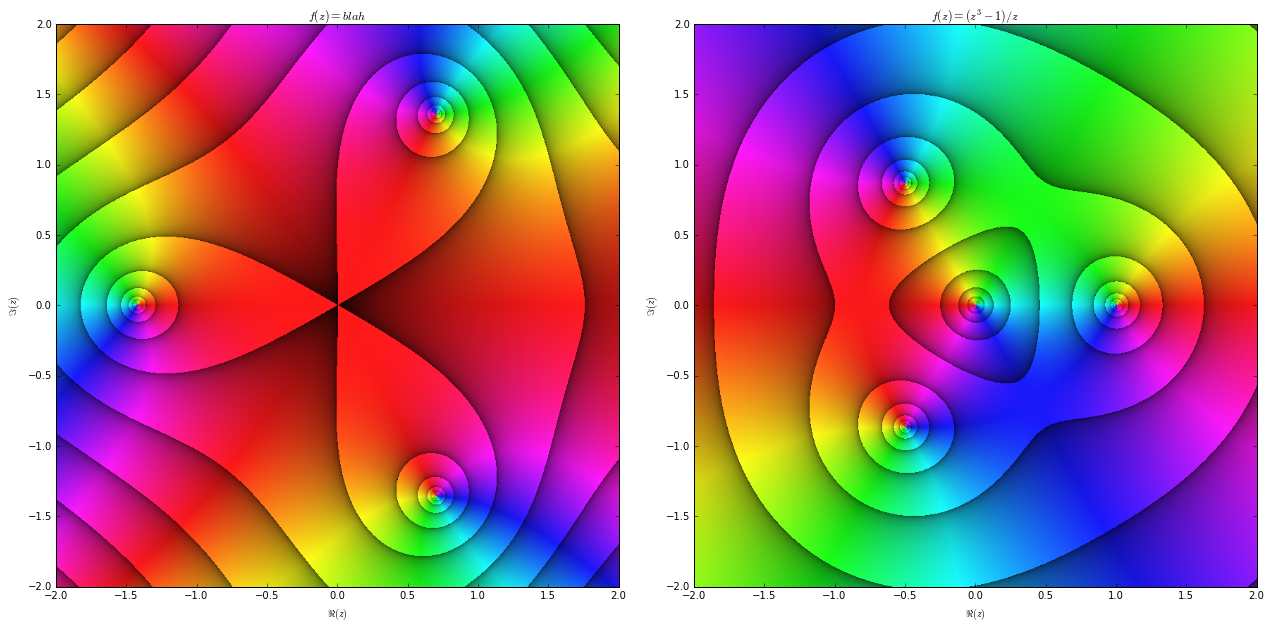

In [8]:
ab=(-2,2)
cd=(-2,2)
plt.subplot(1,2,1)
plot_domain(domaincol_m, lambda z:z*np.sin(0.3*z**2)+np.cos(0.3*z**2),   re=ab, im=cd, Title='$f(z)=blah$',  daxis=True)
plt.subplot(1,2,2)
f=lambda z: (z**3-1)/z
plot_domain(domaincol_m, f,   re=ab, im=cd, Title='$f(z)=(z^3-1)/z$',  daxis=True)
plt.tight_layout(2)

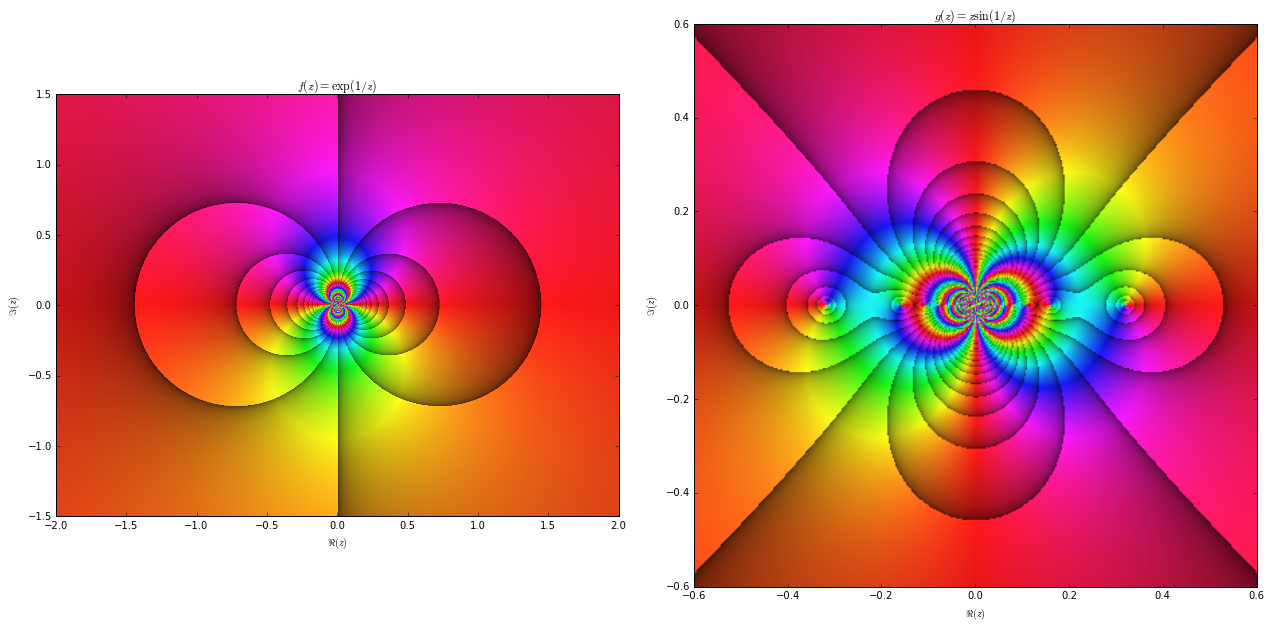

In [9]:
plt.subplot(1,2,1)
ab=(-2,2)
cd=(-1.5,1.5)
f=lambda z: np.exp(1.0/z)
plot_domain(domaincol_m,  f,   re=ab, im=cd, Title='$f(z)=\exp(1/z)$', N=350, daxis=True)
plt.subplot(1,2,2)
ab=(-0.6, 0.6)
cd=(-0.6,0.6)
g=lambda z: z*np.sin(1.0/z)
plot_domain(domaincol_m,  g,   re=ab, im=cd, Title='$g(z)=z\sin(1/z)$',N=350, daxis=True)
plt.tight_layout(2)

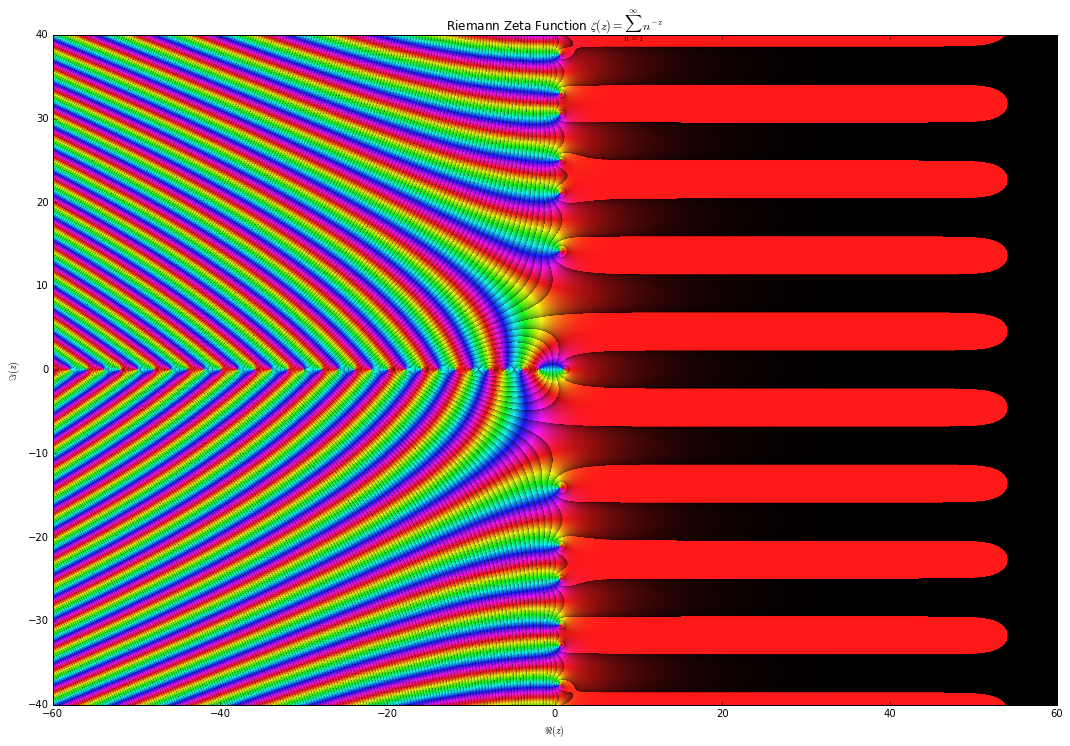

In [10]:
plt.subplot(1,1,1)
ab = (-60.0, 60.0)
cd = (-40.0, 40.0)
def ζ(z):
    return complex(mp.zeta(z))
def vec_ζ(z):
    return np.vectorize(ζ)(z)
plot_domain(domaincol_m, vec_ζ, re=ab, im=cd,
            Title='Riemann Zeta Function $ζ(z)=\sum_{n=1}^{\infty}n^{-z}$',
            N=30, daxis=True)

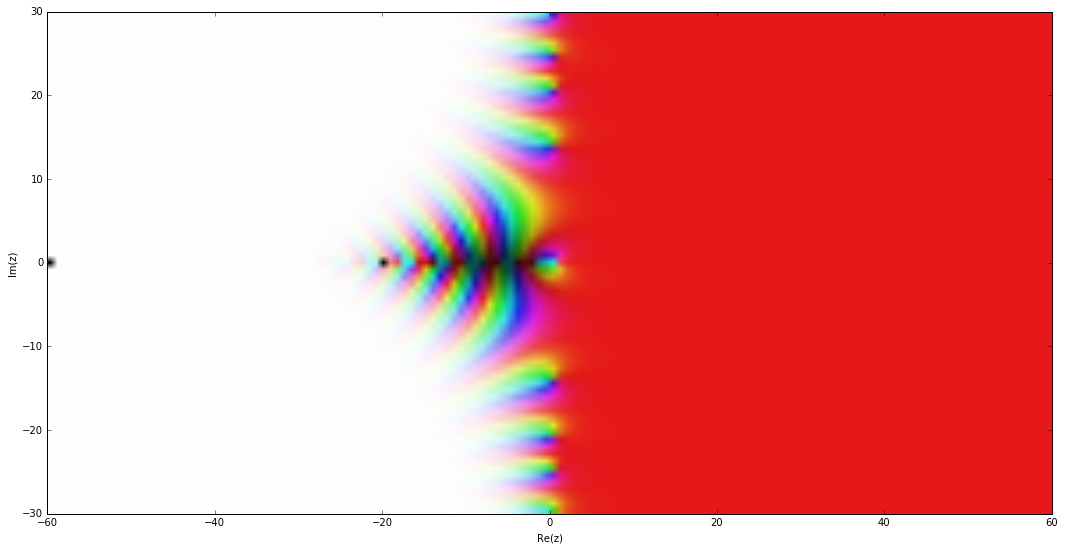

In [11]:
mp.fp.cplot(mp.fp.zeta, [-60,60], [-30,30], points=1e4)